In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import excel dataset as a pandas dataframe

In [126]:
#importing xlsx dataset as pandas  dataframe
spotify_df = pd.read_excel("Cleaned Spotify  Songs Dataset.xlsx")
spotify_df.head()

,Index,Title,Artist,Genre,Year,Popularity,Speechiness,Beats per Minute,Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness
0,1,"Hey, Soul Sister",Train,Neo Mellow,2010-01-01,83,4,97,89,67,-4,8,80,217,19
1,2,Love The Way You Lie,Eminem,Detroit Hip Hop,2010-01-01,82,23,87,93,75,-5,52,64,263,24
2,3,TiK ToK,Kesha,Dance Pop,2010-01-01,80,14,120,84,76,-3,29,71,200,10
3,4,Bad Romance,Lady Gaga,Dance Pop,2010-01-01,79,4,119,92,70,-4,8,71,295,0
4,5,Just the Way You Are,Bruno Mars,Pop,2010-01-01,78,4,109,84,64,-5,9,43,221,2


In [127]:
#Inspect the dataframe
spotify_df.info()
spotify_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Index              603 non-null    int64         
 1   Title              603 non-null    object        
 2   Artist             603 non-null    object        
 3   Genre              603 non-null    object        
 4   Year               603 non-null    datetime64[ns]
 5   Popularity         603 non-null    int64         
 6   Speechiness        603 non-null    int64         
 7   Beats per Minute   603 non-null    int64         
 8   Energy             603 non-null    int64         
 9   Danceability       603 non-null    int64         
 10  Loudness (dB)      603 non-null    int64         
 11  Liveness           603 non-null    int64         
 12  Valence            603 non-null    int64         
 13  Length (Duration)  603 non-null    int64         
 14  Acousticne

(603, 15)

The dataset contains 603 rows and 15 columns.

In [128]:
# Convert Year column data type to year component only for the purpose of our analysis
spotify_df['Year'] = pd.to_datetime(spotify_df['Year']).dt.year
spotify_df.Year.dtype

dtype('int64')

In [129]:
#check for missing data
spotify_df.isnull().sum()

Index                0
Title                0
Artist               0
Genre                0
Year                 0
Popularity           0
Speechiness          0
Beats per Minute     0
Energy               0
Danceability         0
Loudness (dB)        0
Liveness             0
Valence              0
Length (Duration)    0
Acousticness         0
dtype: int64

In [130]:
#Drop the index column. It is not relevant to our analysis.
spotify_df.drop("Index", axis=1, inplace=True)
spotify_df.head()

,Title,Artist,Genre,Year,Popularity,Speechiness,Beats per Minute,Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness
0,"Hey, Soul Sister",Train,Neo Mellow,2010,83,4,97,89,67,-4,8,80,217,19
1,Love The Way You Lie,Eminem,Detroit Hip Hop,2010,82,23,87,93,75,-5,52,64,263,24
2,TiK ToK,Kesha,Dance Pop,2010,80,14,120,84,76,-3,29,71,200,10
3,Bad Romance,Lady Gaga,Dance Pop,2010,79,4,119,92,70,-4,8,71,295,0
4,Just the Way You Are,Bruno Mars,Pop,2010,78,4,109,84,64,-5,9,43,221,2


There are no missing values in our dataset.

Exploratory Data Analysis of the spotify_df.
Key questions to be answered in our analysis include:
1. Examine the correlation of relevant variables. Review coefficents of the relevant variables
2. What were the correlation coefficients you found with the variables in your data?What do you think these coefficients represent?
3. Which variable was more highly correlated with popularity? 
4. Model the relationship of relevant variables using Regression
5. What were the R-squared values you calculated from your data set?
6. List the F and P-values of the data you analyzed and discuss what these answers mean for the significance of the overall analysis. What do these results point to?

Other critical questions that can be answered via ananlyzing the dataset include:
- How does popularity differ by genre, artist, decade/year?
- What are some patterns among the top popular songs?
- What makes a song popular? 

In [131]:
# Examine correlation of all variables in the spotify_df
correlation_matrix = spotify_df.corr()
correlation_matrix

,Year,Popularity,Speechiness,Beats per Minute,Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness
Year,1.000000,0.241261,0.004778,-0.104247,-0.225596,0.079269,-0.126471,-0.136331,-0.122025,-0.215344,0.101725
Popularity,0.241261,1.000000,-0.041490,0.018983,-0.057645,0.116054,0.156897,-0.075749,0.038953,-0.104363,0.026704
Speechiness,0.004778,-0.041490,1.000000,0.058999,0.107313,-0.028041,-0.001110,0.144103,0.122013,0.054564,0.002763
Beats per Minute,-0.104247,0.018983,0.058999,1.000000,0.126170,-0.131301,0.183870,0.081579,0.016021,-0.029359,-0.113257
Energy,-0.225596,-0.057645,0.107313,0.126170,1.000000,0.167209,0.537528,0.186738,0.409577,-0.143610,-0.562287
Danceability,0.079269,0.116054,-0.028041,-0.131301,0.167209,1.000000,0.233170,-0.028801,0.501696,-0.176841,-0.240064
Loudness (dB),-0.126471,0.156897,-0.001110,0.183870,0.537528,0.233170,1.000000,0.081934,0.282922,-0.104723,-0.190401
Liveness,-0.136331,-0.075749,0.144103,0.081579,0.186738,-0.028801,0.081934,1.000000,0.020226,0.098339,-0.098167
Valence,-0.122025,0.038953,0.122013,0.016021,0.409577,0.501696,0.282922,0.020226,1.000000,-0.262256,-0.249038
Length (Duration),-0.215344,-0.104363,0.054564,-0.029359,-0.143610,-0.176841,-0.104723,0.098339,-0.262256,1.000000,0.091802


The correlation_matrix is fairly large thus not easily understood. The best option would involve visualizing the correlation matrix so that we can easily spot trends and outliers.

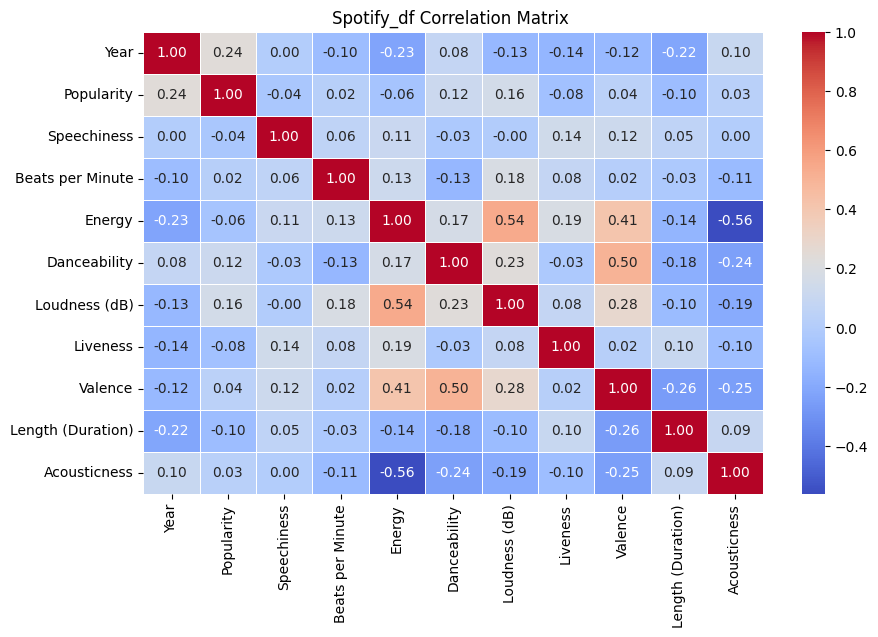

In [132]:
# Visualize the correlation_matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Spotify_df Correlation Matrix ")
plt.show()

Correlation coeficents represent the pairwise direction and strength of two variables. It examines the relationship between independent and dependent variables.

Positively correlated variables move in the same direction. They are represented by +1. Negatively correlated variables move in opposite direction. They are represented by -1.

The strength of correlation is displayed by how close the coefficients are to +1 and -1. Strongly **Positively correlated** variables range between 0.7 to +1. Strongly **Negatively correlated** variables range between 0.7 to -1.

Based on the heatmap above, the coefficeints of the following independent and dependent varaibles can be listed below:
1. Loudness (dB): Popularity (**0.16**). Loudness and popularity have a coefficicent of 0.16, hence are weakly positively correlated.
2. Danceability: Popularity (**0.12**). Danceability and popularity have a coefficicent of 0.12, hence are weakly positively correlated. 
3. Year: Popularity (**0.24**). Year and popularity have a coefficient of 0.24, thus are weakly positively correlated.
4. Loudness (dB): Energy (**0.54**). Loudness and Energy have a coefficient of 0.54, thus are moderately positively correlated. Increase in loudness of a song leads to a corresponding increase in energy associated to that song. 
5. Acousticness: Energy (**-0.56**). Acousticness and Energy are moderately negatively correlated. This means increase in a song's acousticness leads to a decrease in a song's energy.


Variables more correlated with popularity are:
- Loudness (dB)
- Danceability
- Year


To ascertain the accuracy of the coefficents, lets plot two visuals:
1. Plot showing relationship between Year and Popularity
2. Plot showing relationship between Loudness (dB) and Popularity

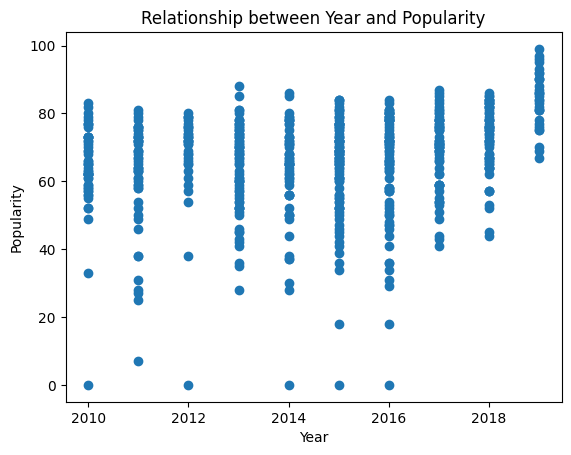

In [133]:
#Plot relationship between Year and Popularity

plt.scatter(spotify_df["Year"], spotify_df["Popularity"])
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.title("Relationship between Year and Popularity")
plt.show()

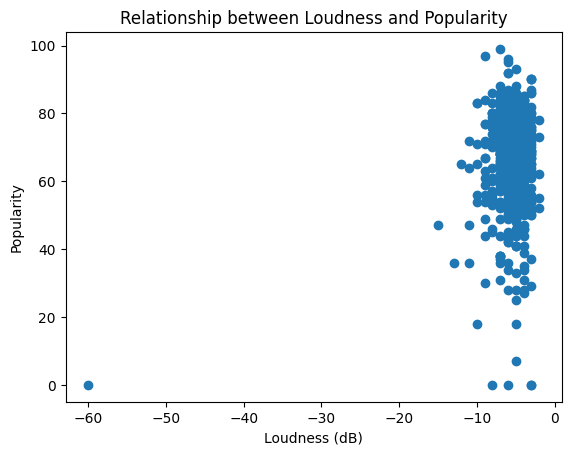

In [134]:
# Plot relationship between Loudness and Popularity

plt.scatter(spotify_df["Loudness (dB)"], spotify_df["Popularity"])
plt.xlabel("Loudness (dB)")
plt.ylabel("Popularity")
plt.title("Relationship between Loudness and Popularity")
plt.show()

The two plots depict the weak positive relationship, Loudness (dB) and Year has with Popularity. 

**Regression Model**:
It is used to model the relationship beween two continous variables. It fits the data between the two variables and predicts target varaibles based on new predictor data.

**Package Used:**
statsmodels.api will be the main package used to create regression model that fits Year and Popularity variables from spotify_df.


In [135]:
import statsmodels.api as sm

# Create the regression model
X = spotify_df["Year"]
y = spotify_df["Popularity"]
X = sm.add_constant(X)  # Add a constant term to the predictor variable
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     37.14
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           1.96e-09
Time:                        14:33:51   Log-Likelihood:                -2450.3
No. Observations:                 603   AIC:                             4905.
Df Residuals:                     601   BIC:                             4913.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2640.0732    444.096     -5.945      0.0

In [136]:
# Obtain R-squared of the regression model
r_squared = model.rsquared
r_squared

0.05820693622417494

The R-squared of the model predicting a song's popularity based on Year is 0.05821

R-squared depicts the proportion of variance in the predicted(target) variable that's explained by the predictor variable.
The R-squared of using Year as a predictor of a song's popularity show that only 5.8% of populrity's varaince is explained by the Year. The low varaince shows that Year variable in spotify_df is not a good predictor of a song's popularity.  

In [137]:
# Extract the F and P-values from the summary of the regression model
f_value = model.fvalue
p_value = model.f_pvalue

print(f"f_value is: {f_value} \n  p_value is: {p_value}")

f_value is: 37.144432271011055 
  p_value is: 1.9610902883688488e-09


We will now shift focus to answering other questions for our data analytics project using SQL and Python.
SQL will enable us retrieve specific insights from the spotify_df.

In [138]:
-- Query all records as a variable:
SELECT * FROM spotify_df




,Title,Artist,Genre,Year,Popularity,Speechiness,Beats per Minute,Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness
0,"Hey, Soul Sister",Train,Neo Mellow,2010,83,4,97,89,67,-4,8,80,217,19
1,Love The Way You Lie,Eminem,Detroit Hip Hop,2010,82,23,87,93,75,-5,52,64,263,24
2,TiK ToK,Kesha,Dance Pop,2010,80,14,120,84,76,-3,29,71,200,10
3,Bad Romance,Lady Gaga,Dance Pop,2010,79,4,119,92,70,-4,8,71,295,0
4,Just the Way You Are,Bruno Mars,Pop,2010,78,4,109,84,64,-5,9,43,221,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,Dance Pop,2019,75,3,104,66,61,-7,20,16,176,1
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,Pop,2019,75,12,95,79,75,-6,7,61,206,21
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,Dance Pop,2019,70,34,136,76,53,-5,9,65,260,7
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,Dance Pop,2019,69,7,114,79,60,-6,42,24,217,1


In [139]:
-- Top 10 Popular Songs
SELECT Title, MAX(Popularity) as Popular
FROM spotify_df
GROUP BY Title
ORDER BY Popular DESC
LIMIT 10;

,Title,Popular
0,Memories,99
1,Lose You To Love Me,97
2,Someone You Loved,96
3,Señorita,95
4,How Do You Sleep?,93
5,South of the Border (feat. Camila Cabello & Ca...,92
6,Trampoline (with ZAYN),92
7,Happier,90
8,Truth Hurts,90
9,Good as Hell (feat. Ariana Grande) - Remix,90


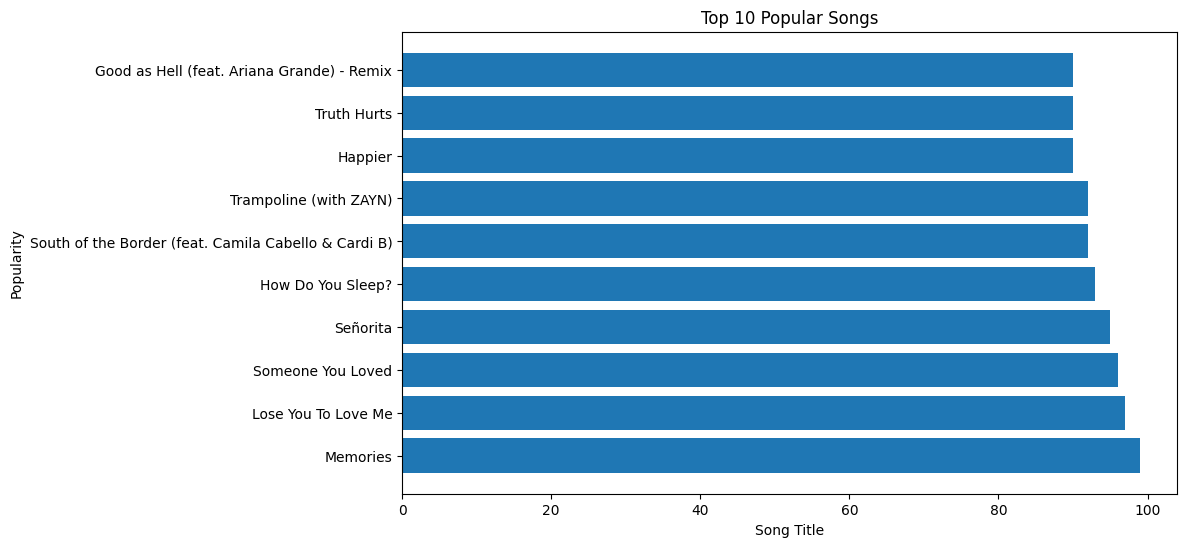

In [140]:
# Plotting the top 10 popular songs
plt.figure(figsize=(10, 6))
plt.barh(Top_10_Popular_Songs['Title'], Top_10_Popular_Songs['Popular'])
plt.xlabel('Song Title')
plt.ylabel('Popularity')
plt.title('Top 10 Popular Songs')
plt.show()

In [141]:
-- Top 10 Popular Genres:
SELECT Genre, MAX(Popularity) as Popular
FROM spotify_df
GROUP BY Genre
ORDER BY Popular DESC
LIMIT 10;

,Genre,Popular
0,Pop,99
1,Dance Pop,97
2,Canadian Pop,95
3,Electropop,92
4,Brostep,90
5,Escape Room,90
6,Edm,88
7,Boy Band,87
8,Neo Mellow,86
9,Big Room,85


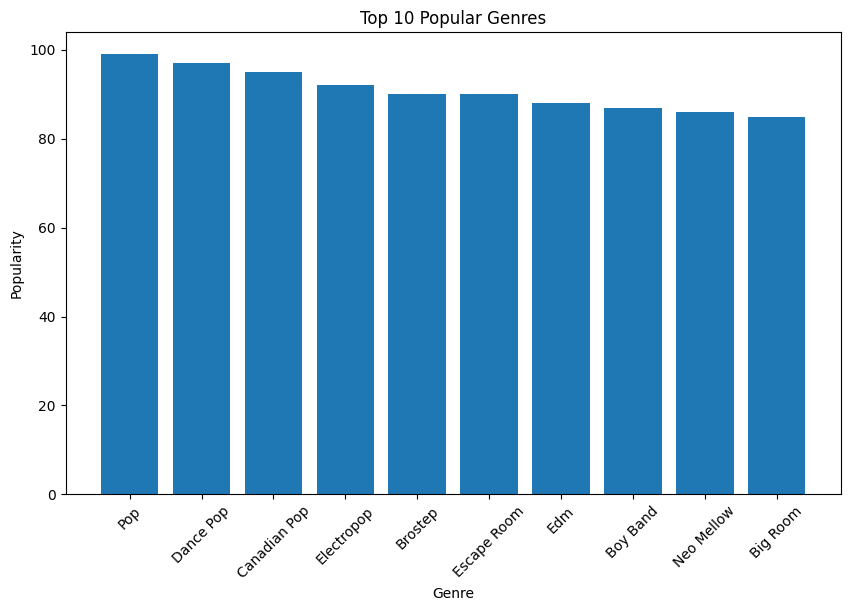

In [142]:
# Plotting the top 10 popular genres
plt.figure(figsize=(10, 6))
plt.bar(Top_10_popular_genres['Genre'], Top_10_popular_genres['Popular'])
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.title('Top 10 Popular Genres')
plt.xticks(rotation=45)  
plt.show()

In [143]:
-- Top 10 Popular Songs by Speechiness
SELECT Title,Speechiness, MAX(Popularity) as Popular
FROM spotify_df
GROUP BY Title, Speechiness
ORDER BY Popular DESC
LIMIT 10;

,Title,Speechiness,Popular
0,Memories,5,99
1,Lose You To Love Me,4,97
2,Someone You Loved,3,96
3,Señorita,3,95
4,How Do You Sleep?,9,93
5,South of the Border (feat. Camila Cabello & Ca...,8,92
6,Trampoline (with ZAYN),3,92
7,Happier,5,90
8,Truth Hurts,11,90
9,Good as Hell (feat. Ariana Grande) - Remix,6,90


Songs with speechiness level below 6 are more popular compared to those with high speechiness.